In [27]:
# import packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from optbinning import BinningProcess, OptimalBinning, Scorecard
from optbinning.scorecard import plot_auc_roc, plot_ks

In [3]:
# read in data
ifood = pd.read_csv('ifood_df.csv')

# Data Preparation

In [8]:
# drop highly correlated variables
ifood_rdu = ifood.drop(['Z_CostContact', 'Z_Revenue', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall'], axis=1)

In [9]:
# convert target variable to binary
ifood_rdu['Response'] = ifood_rdu['Response'].astype('category')

# list all categorical predictor variables
ifood_cat = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
             'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD',
             'marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow',
             'Kidhome', 'Teenhome', 'Complain'
            ]

# convert all variables in list to categorical
ifood_rdu[ifood_cat] = ifood_rdu[ifood_cat].apply(pd.Categorical)

In [10]:
# split data into response and predictor variables
X = ifood_rdu.loc[:, ifood_rdu.columns != 'Response']
y = ifood_rdu['Response']

# 70-30 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

# Variable Binning and Selection

In [16]:
# get list of column names to evaluate
colnames = list(X_train.columns)

# variable selection (IV >= 0.05)
selection_criteria = {"iv": {"min": 0.1, "max": 1}}

# binning criteria
bin_proc = BinningProcess(colnames, selection_criteria = selection_criteria, categorical_variables = ifood_cat)

# fit the model
iv_all = bin_proc.fit(X_train, y_train).summary()

# sort variables by IV and print results
iv_all[iv_all.columns[0:6]].sort_values(by = ["iv"], ascending = False)

,name,dtype,status,selected,n_bins,iv
4,MntWines,numerical,OPTIMAL,True,8,0.576877
6,MntMeatProducts,numerical,OPTIMAL,True,8,0.570438
12,NumCatalogPurchases,numerical,OPTIMAL,True,6,0.564378
17,AcceptedCmp5,categorical,OPTIMAL,True,2,0.542956
9,MntGoldProds,numerical,OPTIMAL,True,9,0.489834
0,Income,numerical,OPTIMAL,True,8,0.447777
18,AcceptedCmp1,categorical,OPTIMAL,True,2,0.438378
22,Customer_Days,numerical,OPTIMAL,True,9,0.418622
3,Recency,numerical,OPTIMAL,True,8,0.374457
15,AcceptedCmp3,categorical,OPTIMAL,True,2,0.353404


# Scorecard Building

In [17]:
# initialize the logistic regression model
estimator = LogisticRegression(solver = "lbfgs")

# build scorecard using the bins (WOE approach) and the estimator defined
scorecard = Scorecard(binning_process = bin_proc,
                      estimator = estimator, scaling_method = "pdo_odds",
                      scaling_method_params = {"pdo": 20, 
                      "scorecard_points": 500, "odds": 9})
                      
scorecard.fit(X_train, y_train)

Scorecard(binning_process=BinningProcess(categorical_variables=['AcceptedCmp1',
                                                                'AcceptedCmp2',
                                                                'AcceptedCmp3',
                                                                'AcceptedCmp4',
                                                                'AcceptedCmp5',
                                                                'education_2n '
                                                                'Cycle',
                                                                'education_Basic',
                                                                'education_Graduation',
                                                                'education_Master',
                                                                'education_PhD',
                                                                'marital_Divorced',
                                                                'marital_Married',
                                                                'marital_Single',
                                                                'marital_Together',
                                                                'marital_Widow',
                                                                'Kidhome',
                                                                'Teenhome',
                                                                'Co...
                                                         'AcceptedCmp3',
                                                         'AcceptedCmp4',
                                                         'AcceptedCmp5',
                                                         'AcceptedCmp1',
                                                         'AcceptedCmp2',
                                                         'Complain', 'Age',
                                                         'Customer_Days',
                                                         'marital_Divorced',
                                                         'marital_Married',
                                                         'marital_Single',
                                                         'marital_Together',
                                                         'marital_Widow',
                                                         'education_2n Cycle',
                                                         'education_Basic', ...]),
          estimator=LogisticRegression(), scaling_method='pdo_odds',
          scaling_method_params={'odds': 9, 'pdo': 20, 'scorecard_points': 500})

In [31]:
# view the points for each level within a variable
customer_card = scorecard.table(style = "summary")
print(customer_card)

          Variable                   Bin     Points
0           Income      (-inf, 22675.50)  26.682376
1           Income  [22675.50, 27248.50)  29.020087
2           Income  [27248.50, 42596.50)  29.604791
3           Income  [42596.50, 65247.50)  30.216292
4           Income  [65247.50, 69103.50)  42.485707
..             ...                   ...        ...
10   Customer_Days               Missing  26.910143
0   marital_Single                   [0]  33.157330
1   marital_Single                   [1]   9.240547
2   marital_Single               Special  26.910143
3   marital_Single               Missing  26.910143

[134 rows x 3 columns]


# Model Evaluation

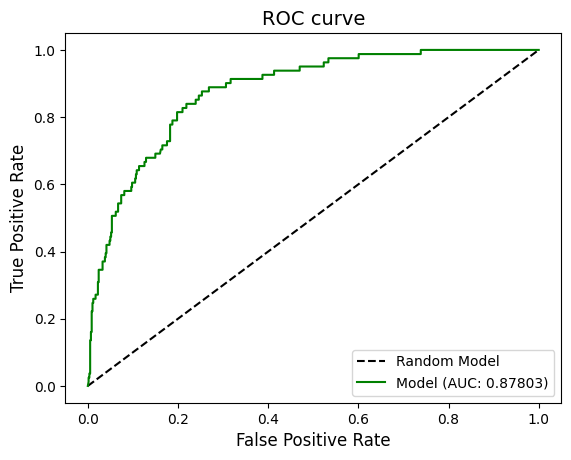

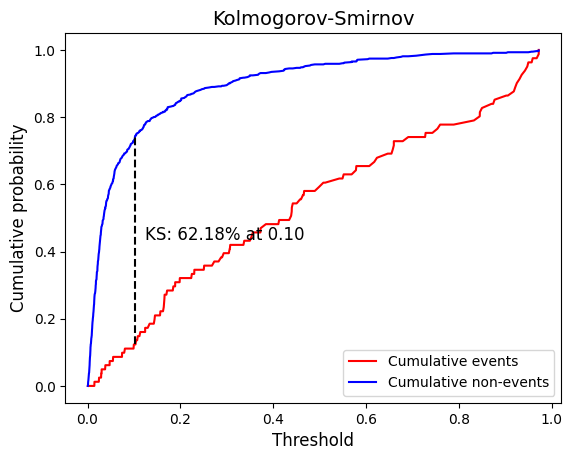

In [20]:
# get predictions
y_pred = scorecard.predict_proba(X_test)[:, 1]

# assess the predictive power with a ROC curve
plot_auc_roc(y_test, y_pred)
plt.show()

# find the optimal cut-off with the KS plot
plot_ks(y_test, y_pred)
plt.show()